## Ratcliff et al (2004)

### Experiment 1

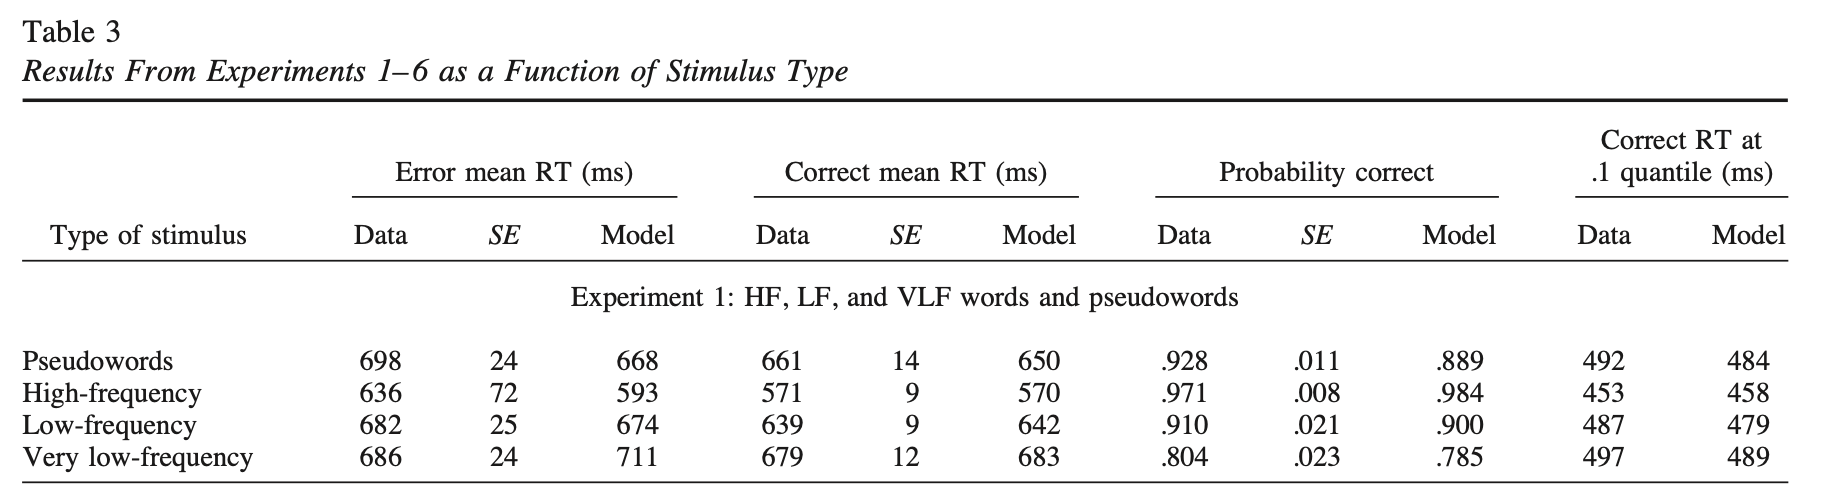

In [1]:
import math
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
N = 200

mean_RT_correct_ps = 661
mean_RT_correct_HF = 571
mean_RT_correct_LF = 639
mean_RT_correct_VF = 679

SD_RT_correct_ps = 14 * (math.sqrt(N))
SD_RT_correct_HF = 9 * (math.sqrt(N))
SD_RT_correct_LF = 9 * (math.sqrt(N))
SD_RT_correct_VF = 12 * (math.sqrt(N))

In [3]:
# simulate data

# pseudo words
sim_RT_ps = np.random.normal(loc = mean_RT_correct_ps,
                            scale = SD_RT_correct_ps,
                            size = N)

# HF words
sim_RT_HF = np.random.normal(loc = mean_RT_correct_HF,
                            scale = SD_RT_correct_HF,
                            size = N)

# LF words
sim_RT_LF = np.random.normal(loc = mean_RT_correct_LF,
                            scale = SD_RT_correct_LF,
                            size = N)


# VF words
sim_RT_VF = np.random.normal(loc = mean_RT_correct_VF,
                            scale = SD_RT_correct_VF,
                            size = N)

In [4]:
RT = list(sim_RT_ps) + list(sim_RT_HF) + list(sim_RT_LF) + list(sim_RT_VF)
condition = ['pseudoword'] * N + ['HF'] * N + ['LF'] * N + ['VF'] * N

data = pd.DataFrame({'RT': RT,
                    'Condition': condition})

<AxesSubplot:xlabel='RT', ylabel='Density'>

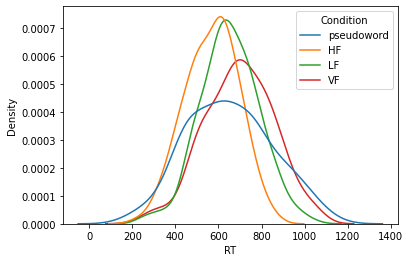

In [5]:
sns.kdeplot(data = data, x = 'RT', hue = 'Condition')

In [72]:

def find_SD(SE, N):
    return(SE * (math.sqrt(N)))

Ns = [16, 14, 15, 17, 15]    

HF_means = [571, 549, 582, 557, 618]
LF_means = [639, 589, 657, 595, 707]

HF_SE = [9, 12, 15, 15, 20]
LF_SE = [9, 14, 16, 16, 23]

HF_SD = []
for s, val in enumerate(HF_SE):
    SD = find_SD(val, Ns[s])
    HF_SD.append(SD)

LF_SD = []
for s, val in enumerate(LF_SE):
    SD = find_SD(val, Ns[s])
    LF_SD.append(SD)

In [77]:

HF_RTs = []
for s, val in enumerate(HF_means):
    sim = np.random.normal(loc = val,
                            scale = HF_SD[s],
                            size = Ns[s])
    HF_RTs.append(list(sim))
    HF_condition.append('HF')
    HF_experiment.append(s+1)


LF_RTs = []
for s, val in enumerate(LF_means):
    sim = np.random.normal(loc = val,
                            scale = LF_SD[s],
                            size = Ns[s])
    LF_RTs.append(list(sim))
    LF_condition.append(['LF']*Ns[s])
    LF_experiment.append([s+1*N])    

HF_RTs = [rt for experiment in HF_RTs for rt in experiment]
LF_RTs = [rt for experiment in LF_RTs for rt in experiment]

In [94]:
RT = HF_RTs + LF_RTs
condition = ['HF'] * len(HF_RTs) + ['LF'] * len(LF_RTs)
experiment = []
for s, val in enumerate(Ns):
    experiment.append([s+1] * val)
experiment = [i for j in experiment for i in j]
experiment = experiment + experiment

In [100]:
data = pd.DataFrame({'RT': RT,
                    'Condition': condition,
                    'Experiment': experiment})
data

,RT,Condition,Experiment
0,613.242865,HF,1
1,578.321499,HF,1
2,598.725718,HF,1
3,603.083957,HF,1
4,593.197895,HF,1
...,...,...,...
149,668.409936,LF,5
150,752.080647,LF,5
151,657.825776,LF,5
152,794.745222,LF,5


<AxesSubplot:xlabel='RT', ylabel='Density'>

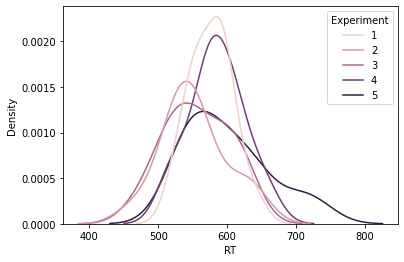

In [106]:
sns.kdeplot(data = data[data['Condition'] == 'HF'], x = 'RT', hue = 'Experiment')

<AxesSubplot:xlabel='RT', ylabel='Density'>

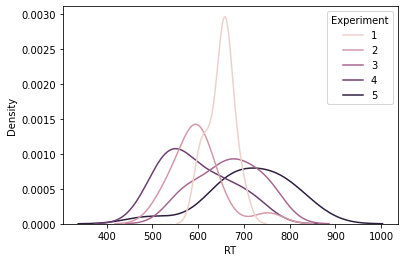

In [107]:
sns.kdeplot(data = data[data['Condition'] == 'LF'], x = 'RT', hue = 'Experiment')

<AxesSubplot:xlabel='RT', ylabel='Density'>

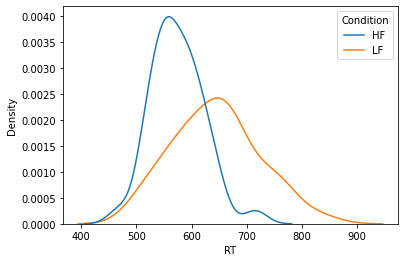

In [131]:
sns.kdeplot(data = data, x = 'RT', hue = 'Condition')

In [120]:
freq_effect = np.array(data[data['Condition'] == 'HF']['RT']) - np.array(data[data['Condition'] == 'LF']['RT'])

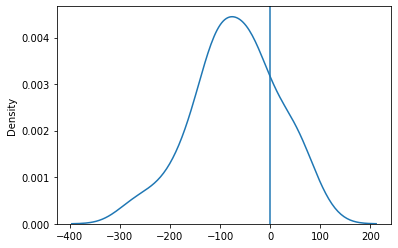

In [136]:
from matplotlib import pyplot as plt
sns.kdeplot(freq_effect)
plt.axvline(0)

In [126]:
np.mean(freq_effect)

-69.39362910218908

In [128]:
np.std(freq_effect)

84.58433640664764

We are *always* operating with estimation and uncertainty. Through simulation, we now have an estimate of the effect of frequency on lexical access (people were 69.39 ms faster for HF words than LF words) over 5 experiments, as well as a measure of our uncertainty about that estimate (the SD of 84.58). We can see this uncertainty graphically in the figure.